## Multiple Linear Regression

Now you know how to build a model with one X (independent variable) and Y (dependent variable). But what if you have three feature variables, or may be 10 or 100? By using multiple linear regression, you can build models between a dependent variable and many independent variables.

Dataset - advertising.csv

Independent variables - TV Ad Expenses, Radio Ad Expenses, Newspaper Ad Expenses

Dependent variable - Sales

In [51]:
#1 Import necessery libraries
import numpy as np
import pandas as pd

In [52]:
#2 Import the dataset (advertising.csv) and look at the top five rows
dataset=pd.read_csv('advertising.csv')
dataset.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [53]:
#3 Look at the bottom five rows
dataset.tail(5)

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [54]:
#4 Check the shape of the DataFrame (rows, columns)
dataset.shape

(200, 4)

In [55]:
#5 Look at the data types of the column
print(dataset.dtypes)

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object


In [56]:
#6 Look at the summary statistics
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [57]:
#7 Do a pairplot of the variables
import seaborn as sns
sns.pairplot(dataset)

C:\Users\venu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


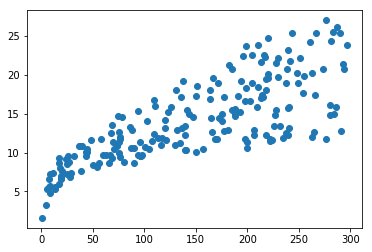

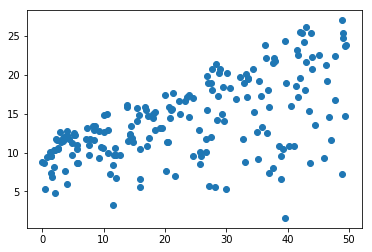

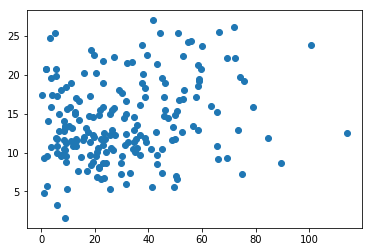

In [58]:
#8 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
import matplotlib.pyplot as plt
for i in dataset:
    if(i!='Sales'):
        plt.scatter(dataset.ix[:,i],dataset.ix[:,-1])
        plt.show()


In [59]:
#9 Prepare  X (independent variables) and y (dependent variable)
X=dataset.iloc[:,:-1]
Y=dataset.iloc[:,-1]

In [60]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
type(X_train)

pandas.core.frame.DataFrame

In [72]:
#11 Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score
LR=LinearRegression()
LR.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

0.8649018906637792


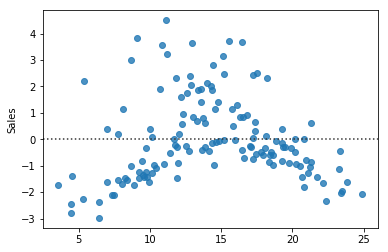

In [73]:
#12 Predict on the train set and calculate the error = y_pred - y_train
# Residual plot - plot y_pred in x axis and errors in y axis
print(r2_score(Y_test,LR.predict(X_test)))
sns.residplot(LR.predict(X_train),LR.predict(X_train)-Y_train)


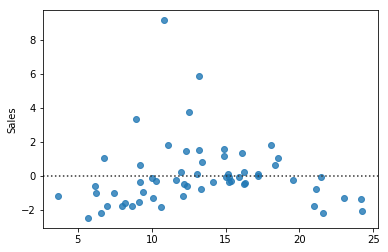

In [74]:
#13 Predic on the test set 
LR.predict(X_test)
sns.residplot(LR.predict(X_test),LR.predict(X_test)-Y_test)

In [75]:
#14 Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,LR.predict(X_test))

3.6913948456986083

## Backward elimination

In [76]:
#15 Build the optimal model using backward elimination
import statsmodels.api as sm
sm.OLS(Y,X).fit().summary()







<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     826.0
Date:                Thu, 28 Mar 2019   Prob (F-statistic):           6.45e-47
Time:                        21:15:15   Log-Likelihood:                -130.65
No. Observations:                  60   AIC:                             267.3
Df Residuals:                      57   BIC:                             273.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0581      0.003     21.908      0.000       0.053       0.063
Radio          0.1879      0.022      8.508      0.000       0.144       0.232
Newspaper      0.0231      0.013      1.751      0.085      -0.003       0.049
==============================================================================
Omnibus:                        4.679   Durbin-Watson:                   1.741
Prob(Omnibus):                  0.096   Jarque-Bera (JB):                3.743
Skew:                          -0.573   Prob(JB):                        0.154
Kurtosis:                       3.431   Cond. No.                         13.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [3]:
#16Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
Data = pd.read_csv('Housing.csv')
Data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
#17 Look at the bottom five rows
Data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [5]:
#18 Check the shape of the DataFrame (rows, columns)
Data.shape

(545, 13)

In [6]:
#19 Look at the data types of the columns
Data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [32]:
#20 Look at the summary statistics
Data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [43]:
#21 Prepare  X (independent variables) and y (dependent variable)
x=Data.iloc[:,1:]
y=Data.iloc[:,0]
del x['stories']
x.head()

,area,bedrooms,bathrooms,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,yes,yes,yes,no,yes,2,no,furnished


In [44]:
#22 Encoding categorical data in X
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
L=LabelEncoder()
'''for i in x:
    if(x[i].dtype=='object'):
        x[i]=L.fit_transform(x[i])
x.head()
o=OneHotEncoder(categorical_features=[10])
x=o.fit_transform(x).toarray()
x=x[:,:]
x=pd.DataFrame(x)
del x[2]
x.head()'''

x.iloc[:,3]=L.fit_transform(x.iloc[:,3])
x.iloc[:,4]=L.fit_transform(x.iloc[:,4])
x.iloc[:,5]=L.fit_transform(x.iloc[:,5])
x.iloc[:,6]=L.fit_transform(x.iloc[:,6])
x.iloc[:,7]=L.fit_transform(x.iloc[:,7])
x.iloc[:,9]=L.fit_transform(x.iloc[:,9])
x.iloc[:,10]=L.fit_transform(x.iloc[:,10])
x



,area,bedrooms,bathrooms,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,1,0,0,0,1,2,1,0
1,8960,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,1,0,1,0,0,2,1,1
3,7500,4,2,1,0,1,0,1,3,1,0
4,7420,4,1,1,1,1,0,1,2,0,0
5,7500,3,3,1,0,1,0,1,2,1,1
6,8580,4,3,1,0,0,0,1,2,1,1
7,16200,5,3,1,0,0,0,0,0,0,2
8,8100,4,1,1,1,1,0,1,2,1,0
9,5750,3,2,1,1,0,0,1,1,1,2


In [49]:
#23 Avoiding the Dummy Variable Trap
O=OneHotEncoder(categorical_features=[3])
x=O.fit_transform(x).toarray()
x=x[:,:]
x

array([[0., 1., 1., ..., 2., 1., 0.],
       [0., 1., 1., ..., 3., 0., 0.],
       [1., 0., 1., ..., 2., 1., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 2.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 2.]])

In [36]:
#24 Look at the top 5 rows after preprocessing
x.head()

,area,bedrooms,bathrooms,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,1,0,0,0,1,2,yes,furnished
1,8960,4,4,1,0,0,0,1,3,no,furnished
2,9960,3,2,1,0,1,0,0,2,yes,semi-furnished
3,7500,4,2,1,0,1,0,1,3,yes,furnished
4,7420,4,1,1,1,1,0,1,2,no,furnished


In [88]:
#25 Apply feature scaling on numerical variables
from sklearn.preprocessing import StandardScaler
S=StandardScaler()
x=S.fit_transform(x)
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.700840,-0.844888,1.046726,1.403419,1.421812,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941
1,1.700840,-0.844888,1.757010,1.403419,5.405809,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035
2,-0.587945,1.183588,2.218232,0.047278,1.421812,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941
3,1.700840,-0.844888,1.083624,1.403419,1.421812,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941
4,1.700840,-0.844888,1.046726,1.403419,-0.570187,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035


In [89]:
#26 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
from sklearn.preprocessing import StandardScaler
del x_test[3]

del x_train[3]
p=LR.fit(x_train,y_train)
r2_score(y_test,p.predict(x_test))

0.6698890871061093

## Backward elimination

In [91]:
#27 #15 Build the optimal model using backward elimination

import statsmodels.api as sm
x2=sm.add_constant(x)
k=sm.OLS(y,x2)
f=k.fit()
print(f.summary())







                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     83.14
Date:                Thu, 28 Mar 2019   Prob (F-statistic):          1.36e-113
Time:                        21:20:28   Log-Likelihood:                -8355.7
No. Observations:                 545   AIC:                         1.674e+04
Df Residuals:                     532   BIC:                         1.679e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.767e+06   4.78e+04     99.765      0.0